# Twitter data sentiment analysis
- 1) Twitter data : First step is to configure twiiter API and to gather twitter data
- 2) To Clean our Data
- 3) Sentiment :To find out sentiment
- 4) Analysis :to do analysis


In [70]:
import tweepy # to gather twitter data
from textblob import TextBlob  # to find out sentiment
import pandas as pd
import matplotlib.pyplot as plt
import  re
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

## Get the twitter configuration and gets the tweets

In [3]:
## Twitter-api Credentials
APIKey = "G8lb2USnND8L"
APIsecretKey = "qiOx1g2JwkHjX6wgj0HSUu1eGHSBrw63nuORKM4D"
accessToken="1639525728-TdZbGajGo5DktEXz3JqDRZ58eDM"
accessTokenSecret = "we9wiZXcMICW47xcqJdBwqpj7b1g8"

In [4]:
# create the authentication object
authenticate = tweepy.OAuthHandler(APIKey,APIsecretKey)
authenticate.set_access_token(accessToken,accessTokenSecret)
api = tweepy.API(authenticate)


In [5]:
posts= api.user_timeline(screen_name='Trump',count=100,lang="en",tweet_mode = 'extended')  ## tweet mode =extended: to get the full text attribute
## try it to readable  form
## for to get 100 tweets
i =1
for tweet in posts[:10]: # just want to see from top 10 out of 100 tweets
    print(str(i) +')' + tweet.full_text +'\n' )
    i=i+1
    

Unexpected parameter: lang


1)From dramatic Scottish coastlines to thriving city centers, our @TrumpHotels destinations were designed to deliver the ultimate experience for every traveler. https://t.co/AcME2ome8v

2)RT @TrumpGolf: Congratulations to our Director of Golf at @TrumpGolfLA, Keith Murakami, on receiving the TaylorMade Business Excellence Awa…

3)Transporting ourselves to @TrumpGolfLA this wintery weekend, where vivid Pacific Ocean sunsets take place daily. Experience the magic yourself, book a tee time at https://t.co/n35fzkMCQF⛳️ https://t.co/RxJYlPpww2

4)A lavish tropical retreat awaits you with refreshing coastal cuisine and calming ocean views. Plan your winter getaway to @TrumpWaikiki at https://t.co/utQfAYwuH8. https://t.co/dXZ3nWBBpi

5)From arrival to departure, experience unparalleled luxury during every moment of your stay at @TrumpLasVegas, our exquisite hotel in the City of Lights. Explore special offers at https://t.co/HzxzdQLcjW. https://t.co/4u0sNwbmsK

6)The Green Room at @TrumpBedmin

In [6]:
posts

[Status(_api=<tweepy.api.API object at 0x000002341B50C4C0>, _json={'created_at': 'Thu Jan 27 13:51:59 +0000 2022', 'id': 1486698502436663298, 'id_str': '1486698502436663298', 'full_text': 'From dramatic Scottish coastlines to thriving city centers, our @TrumpHotels destinations were designed to deliver the ultimate experience for every traveler. https://t.co/AcME2ome8v', 'truncated': False, 'display_text_range': [0, 158], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'TrumpHotels', 'name': 'Trump Hotels', 'id': 67119128, 'id_str': '67119128', 'indices': [64, 76]}], 'urls': [], 'media': [{'id': 1486698498120691717, 'id_str': '1486698498120691717', 'indices': [159, 182], 'media_url': 'http://pbs.twimg.com/media/FKHQaDyXMAUhdS-.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FKHQaDyXMAUhdS-.jpg', 'url': 'https://t.co/AcME2ome8v', 'display_url': 'pic.twitter.com/AcME2ome8v', 'expanded_url': 'https://twitter.com/Trump/status/1486698502436663298/photo/1'

In [7]:
## create a dataframe with a column called tweets
df = pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])

In [8]:
df

,Tweets
0,From dramatic Scottish coastlines to thriving ...
1,RT @TrumpGolf: Congratulations to our Director...
2,Transporting ourselves to @TrumpGolfLA this wi...
3,A lavish tropical retreat awaits you with refr...
4,"From arrival to departure, experience unparall..."
...,...
95,Follow in the footsteps of golf legends on the...
96,Savor the sweetness of @TrumpStore chocolates ...
97,RT @TrumpHotels: Spotted: The ever innovative ...
98,Is @TrumpGolfLA on your bucket list? Take a vi...


In [169]:
## make a function to clean data
## to clean the data
def cleanText(text):
    text = re.sub('@[A-Za-z0-9]+',' ',text) # removing unwanted characters mention in tweets
    text = re.sub('#',' ',text)  # removing # characters
    text = re.sub('RT[\S]+',' ',text) # removoing retweet characters
    text  =re.sub(' https?:\/\/\S+',' ',text)# removing the hyperper link
    return text

In [170]:
df['Tweets'] = df['Tweets'].apply(cleanText)

In [171]:
df

,Tweets,Subjectivity,Polarity,Analysis
0,From dramatic Scottish coastlines to thriving ...,0.800000,-0.216667,Negative
1,RT : Congratulations to our Director of Golf ...,0.000000,0.000000,Neutral
2,Transporting ourselves to this wintery weeke...,0.583333,0.208333,Positive
3,A lavish tropical retreat awaits you with refr...,1.000000,0.500000,Positive
4,"From arrival to departure, experience unparall...",0.523810,0.485714,Positive
...,...,...,...,...
95,Follow in the footsteps of golf legends on the...,0.500000,0.250000,Positive
96,Savor the sweetness of chocolates all summer...,0.400000,-0.062500,Negative
97,RT : Spotted: The ever innovative 's Burst Y...,1.000000,0.500000,Positive
98,Is on your bucket list? Take a virtual tour ...,0.488889,0.033333,Positive


## Find Out Sentiments

In [172]:
analysis = TextBlob('Today was the worst Day')
analysis.sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)

In [173]:
## create a function to get the subjectivity of all the tweets
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

## create a function to get the polarity of all the tweets
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

In [174]:
## create two columns for subjectivity and polarity
df['Subjectivity'] = df['Tweets'].apply(getsubjectivity)
df['Polarity'] = df['Tweets'].apply(getpolarity)

In [175]:
df

,Tweets,Subjectivity,Polarity,Analysis
0,From dramatic Scottish coastlines to thriving ...,0.800000,-0.216667,Negative
1,RT : Congratulations to our Director of Golf ...,0.000000,0.000000,Neutral
2,Transporting ourselves to this wintery weeke...,0.583333,0.208333,Positive
3,A lavish tropical retreat awaits you with refr...,1.000000,0.500000,Positive
4,"From arrival to departure, experience unparall...",0.523810,0.485714,Positive
...,...,...,...,...
95,Follow in the footsteps of golf legends on the...,0.500000,0.250000,Positive
96,Savor the sweetness of chocolates all summer...,0.400000,-0.062500,Negative
97,RT : Spotted: The ever innovative 's Burst Y...,1.000000,0.500000,Positive
98,Is on your bucket list? Take a virtual tour ...,0.488889,0.033333,Positive


##  Analysis Part

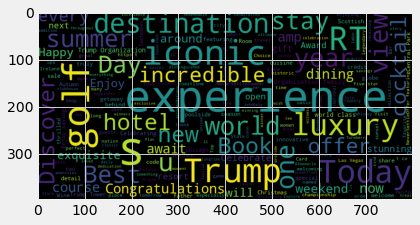

In [176]:
## what are those most Frequent words in all the tweets?
## WordCloud visualizations
allwords = ' '.join(i for  i in df['Tweets'])
Cloud = WordCloud(width=800,height = 400,random_state =0 ,max_font_size = 100).generate(allwords)
plt.imshow(Cloud)
plt.show()

In [177]:
## create a function to compute negative,positive,and Nutral

def getanalysis(score):
    if(score<0):
        return 'Negative'
    elif score==0:
    
    
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis']  = df['Polarity'].apply(getanalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,From dramatic Scottish coastlines to thriving ...,0.800000,-0.216667,Negative
1,RT : Congratulations to our Director of Golf ...,0.000000,0.000000,Neutral
2,Transporting ourselves to this wintery weeke...,0.583333,0.208333,Positive
3,A lavish tropical retreat awaits you with refr...,1.000000,0.500000,Positive
4,"From arrival to departure, experience unparall...",0.523810,0.485714,Positive
...,...,...,...,...
95,Follow in the footsteps of golf legends on the...,0.500000,0.250000,Positive
96,Savor the sweetness of chocolates all summer...,0.400000,-0.062500,Negative
97,RT : Spotted: The ever innovative 's Burst Y...,1.000000,0.500000,Positive
98,Is on your bucket list? Take a virtual tour ...,0.488889,0.033333,Positive


In [178]:
df['Analysis'].value_counts()

Positive    81
Neutral     14
Negative     5
Name: Analysis, dtype: int64

In [179]:
df.shape

(100, 4)

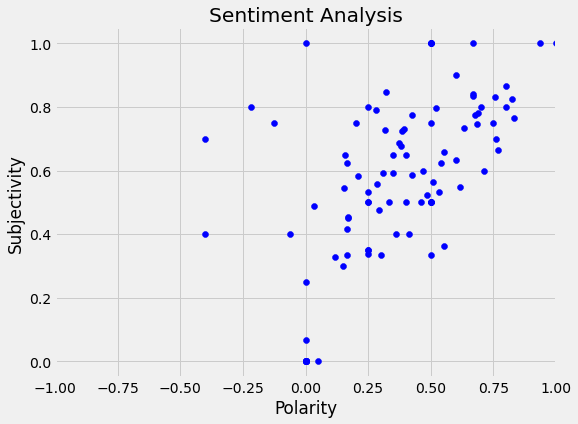

In [180]:
## plotting the scatter plot
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='blue')
    plt.xlim(-1,1)
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')
    plt.title('Sentiment Analysis')

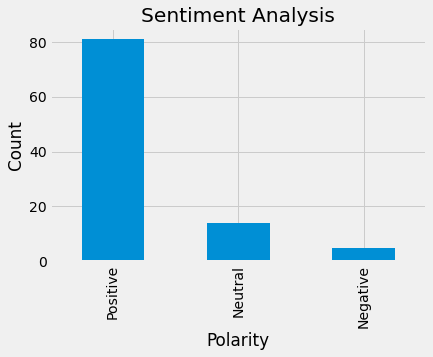

In [181]:
df['Analysis'].value_counts().plot(kind='bar')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Sentiment Analysis')
plt.show()

In [182]:
## only positive tweets only
i =1
short = df.sort_values(by = ['Polarity'],ascending=False)
for j in range(0,short.shape[0]):
    if (short['Analysis'][j] =='Positive'):
        print (str(i)+' )' +short['Tweets'][j])
        print()
        i=i+1



1 )Transporting ourselves to   this wintery weekend, where vivid Pacific Ocean sunsets take place daily. Experience the magic yourself, book a tee time at  

2 )A lavish tropical retreat awaits you with refreshing coastal cuisine and calming ocean views. Plan your winter getaway to   at  

3 )From arrival to departure, experience unparalleled luxury during every moment of your stay at  , our exquisite hotel in the City of Lights. Explore special offers at  

4 )The Green Room at  . Elegant and refined, this space enhances the distinguished atmosphere that exists throughout the main clubhouse, a renovated 1930s Georgian Revival Manor. 

5 )Discover a Trump Treasure in   this  NationalTriviaDay.

During the First World War, Turnberry was converted into a flying school for pilots before becoming an airfield for the Royal Air Force while its hotel served as a hospital for the wounded during World War II. 

6 )As we close out one year and enter the next, we hope that 2022 will be a year ful

In [183]:
##a = df.sort_values(by =['Polarity'],ascending =False )
##a

In [184]:
# for Negative tweets
short = df.sort_values(by=['Polarity'],ascending = False)
for j in range(0,short.shape[0]):
    if(short['Analysis'][j]=='Negative'):
        print(str(i)+') '+short['Tweets'][j])
        i = i+1
        print()

82) From dramatic Scottish coastlines to thriving city centers, our   destinations were designed to deliver the ultimate experience for every traveler. 

83) 450 hours of labor and 446 pounds of all-purpose flour… we’ll let the mastermind behind  ’s Gingerbread Express, Executive Pastry Chef Hernandez, tell the rest.  

84) Discover all things  . From plush accommodations and oceanfront dining to award-winning golf and endless amenities, the experience provided by our luxury golf resort is beyond enchanting. 

85) RT  : Today we celebrate women in the game of golf and recognize the skills, relationships, and experiences that are created throu…

86) Savor the sweetness of   chocolates all summer long. Shipping of our decadent treats will pause May 1st and resume September 30th. Stock up today! 



In [185]:
# for Neutral tweets
short = df.sort_values(by=['Polarity'],ascending = False)
for j in range(0,short.shape[0]):
    if(short['Analysis'][j]=='Neutral'):
        print(str(i)+') '+short['Tweets'][j])
        i = i+1
        print()

87) RT  : Congratulations to our Director of Golf at  , Keith Murakami, on receiving the TaylorMade Business Excellence Awa…

88) A glimpse into autumn at the distinguished  .🍂 

89) Celebrate the start of fall with a Trump Digital Gift Card. Redeemable at  ,   and Trump Spas, an array of seasonal experiences await you at our world-class destinations around the globe. Visit  

90) Discover the opulent details of  ’s Crystal Ballroom Foyer.✨ 

91) Settling into our weekend oasis,  ’s relaxing Royal Palm Pool. 

92) To be enamored by   is an understatement. This 92-story, luxury   destination stuns from every angle.✨ 

93) A luxury hotel legend and our CEO of  , Eric Danziger, was recently featured on the Mary Gostelow Girlahead Podcast. Listen now at  

94) A luxury public golf experience awaits you from coast to coast. Which one of our   courses will you play this  NationalGolfMonth:  ,  , or  ?⛳️ 

95) A wee dram is a must during any visit to our famed Clavis Whisky Bar at  ’s MacLeod